# ADS 502 Final Project
# 
## Heart Failure Detection
# 
### Team 4

In [580]:
import warnings
warnings.filterwarnings('ignore')

In [581]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tools.tools as stattools
import statsmodels.stats.outliers_influence as inf

from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from keras.models import Sequential
from keras.layers import Dense
#warnings.filterwarning("ignore")

In [582]:
pd.set_option('display.max_columns', None)

In [583]:
url = 'https://raw.githubusercontent.com/dingyiduan7/ADS-502/main/ADS%20502%20Final_Project/heart_failure_clinical_records_dataset.csv'
heart = pd.read_csv(url)
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Exploratory Data Analysis (EDA)

Get a summary of the dataframe

In [584]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


First, check for missing data

In [585]:
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Use skewness of histogram and boxplot to check for outliers

<AxesSubplot:ylabel='Frequency'>

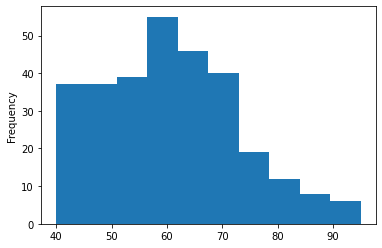

In [586]:
heart['age'].plot.hist()

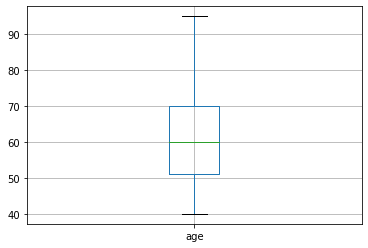

In [587]:
fig = plt.figure()
boxplot = heart.boxplot(column=['age'])

<AxesSubplot:ylabel='Frequency'>

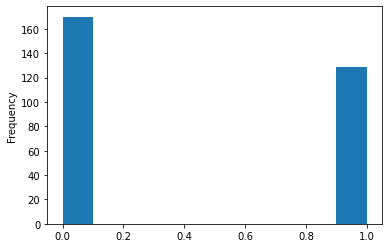

In [588]:
heart['anaemia'].plot.hist()

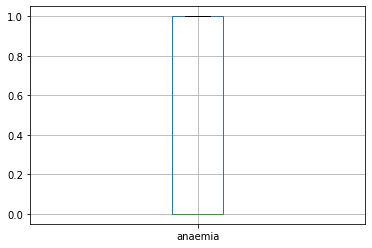

In [589]:
fig = plt.figure()
boxplot = heart.boxplot(column=['anaemia'])

<AxesSubplot:ylabel='Frequency'>

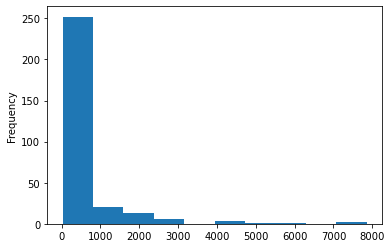

In [590]:
heart['creatinine_phosphokinase'].plot.hist()

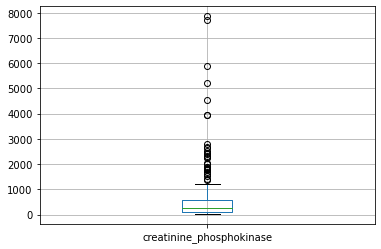

In [591]:
fig = plt.figure()
boxplot = heart.boxplot(column=['creatinine_phosphokinase'])

<AxesSubplot:ylabel='Frequency'>

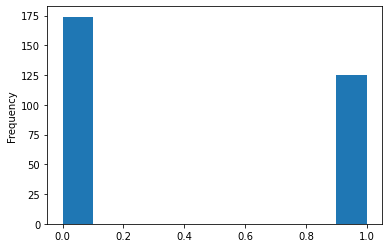

In [592]:
heart['diabetes'].plot.hist()

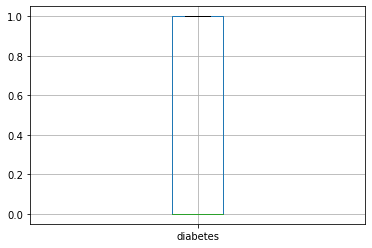

In [593]:
fig = plt.figure()
boxplot = heart.boxplot(column=['diabetes'])

<AxesSubplot:ylabel='Frequency'>

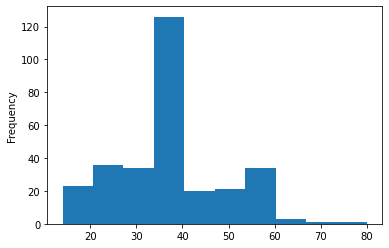

In [594]:
heart['ejection_fraction'].plot.hist()

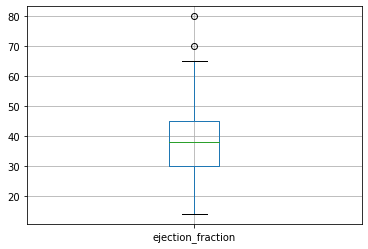

In [595]:
fig = plt.figure()
boxplot = heart.boxplot(column=['ejection_fraction'])

<AxesSubplot:ylabel='Frequency'>

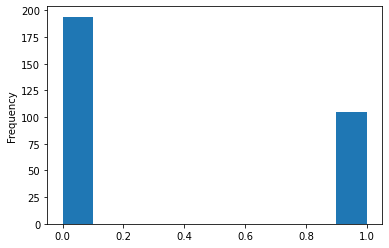

In [596]:
heart['high_blood_pressure'].plot.hist()

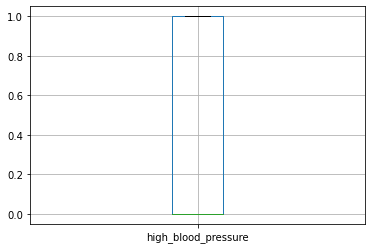

In [597]:
fig = plt.figure()
boxplot = heart.boxplot(column=['high_blood_pressure'])

<AxesSubplot:ylabel='Frequency'>

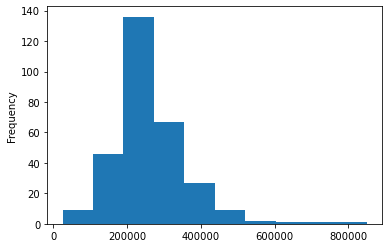

In [598]:
heart['platelets'].plot.hist()

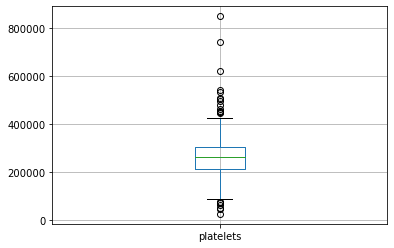

In [599]:
fig = plt.figure()
boxplot = heart.boxplot(column=['platelets'])

<AxesSubplot:ylabel='Frequency'>

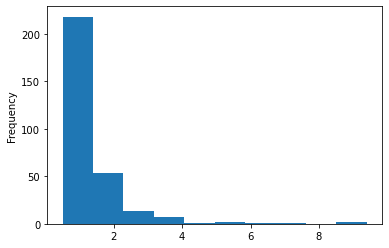

In [600]:
heart['serum_creatinine'].plot.hist()

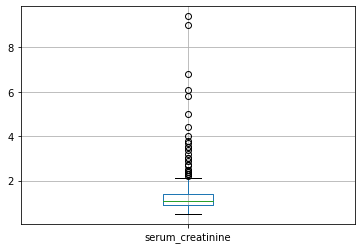

In [601]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_creatinine'])

<AxesSubplot:ylabel='Frequency'>

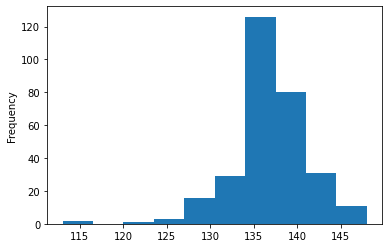

In [602]:
heart['serum_sodium'].plot.hist()

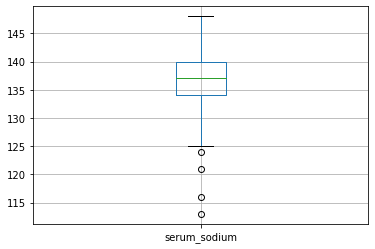

In [603]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_sodium'])

<AxesSubplot:ylabel='Frequency'>

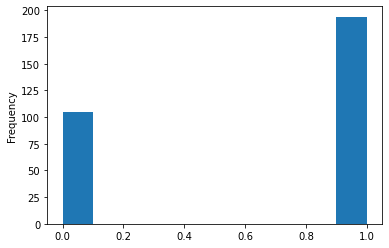

In [604]:
heart['sex'].plot.hist()

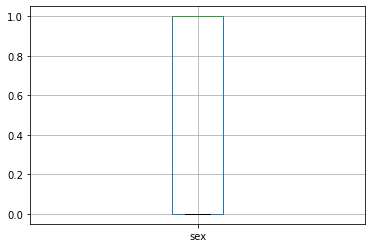

In [605]:
fig = plt.figure()
boxplot = heart.boxplot(column=['sex'])

<AxesSubplot:ylabel='Frequency'>

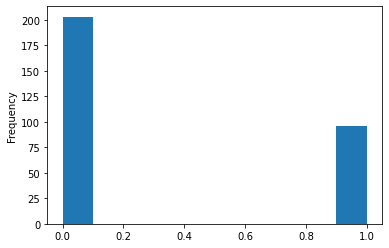

In [606]:
heart['smoking'].plot.hist()

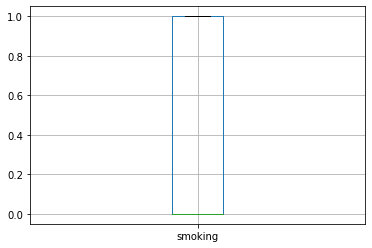

In [607]:
fig = plt.figure()
boxplot = heart.boxplot(column=['smoking'])

<AxesSubplot:ylabel='Frequency'>

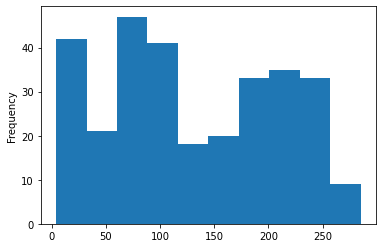

In [608]:
heart['time'].plot.hist()

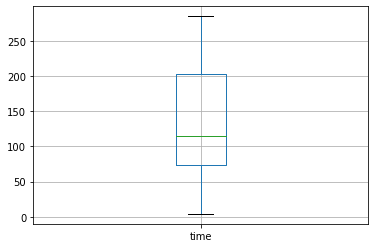

In [609]:
fig = plt.figure()
boxplot = heart.boxplot(column=['time'])

Based on the skewness and boxplot, we've decided to replace the outliers with median value in for these variables:
#### creatinine_phosphokinase
#### ejection_fraction
#### platelets
#### serum_creatinine
#### serum_sodium

Make a subset of above variables

In [610]:
heart_var = heart[["creatinine_phosphokinase", "ejection_fraction","platelets","serum_creatinine","serum_sodium"]]

In [611]:
heart.drop(["creatinine_phosphokinase", "ejection_fraction","platelets","serum_creatinine","serum_sodium"], axis=1, inplace=True)
heart.head()

,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time,DEATH_EVENT
0,75.0,0,0,1,1,0,4,1
1,55.0,0,0,0,1,0,6,1
2,65.0,0,0,0,1,1,7,1
3,50.0,1,0,0,1,0,7,1
4,65.0,1,1,0,0,0,8,1


In [612]:
heart_var.head()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,582,20,265000.00,1.9,130
1,7861,38,263358.03,1.1,136
2,146,20,162000.00,1.3,129
3,111,20,210000.00,1.9,137
4,160,20,327000.00,2.7,116


Replace outliers with median values

In [613]:
for col in heart_var:   
    
    q3 = np.percentile(heart_var[col], 75)
    q1 = np.percentile(heart_var[col], 25)
    iqr = q3 - q1
    
    lower = q1 -(1.5 * iqr) 
    upper = q3 +(1.5 * iqr)
    
    med = heart_var[col].median()

    heart_var[col] = np.where((heart_var[col] >= upper), med ,heart_var[col]) 
    
    heart_var[col] = np.where((heart_var[col] <= lower), med ,heart_var[col])

In [614]:
heart = pd.concat([heart_var, heart], axis=1, join='inner')

In [615]:
heart.head()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time,DEATH_EVENT
0,582.0,20.0,265000.00,1.9,130.0,75.0,0,0,1,1,0,4,1
1,250.0,38.0,263358.03,1.1,136.0,55.0,0,0,0,1,0,6,1
2,146.0,20.0,162000.00,1.3,129.0,65.0,0,0,0,1,1,7,1
3,111.0,20.0,210000.00,1.9,137.0,50.0,1,0,0,1,0,7,1
4,160.0,20.0,327000.00,1.1,137.0,65.0,1,1,0,0,0,8,1


Check for outliers again

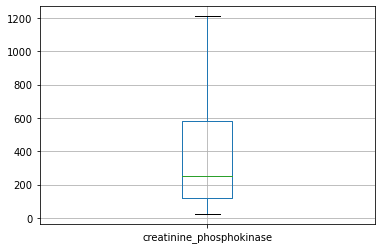

In [616]:
fig = plt.figure()
boxplot = heart.boxplot(column=['creatinine_phosphokinase'])

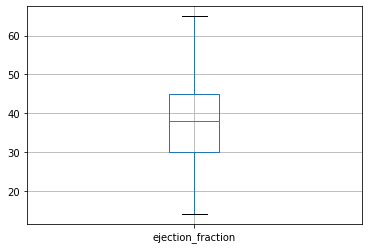

In [617]:
fig = plt.figure()
boxplot = heart.boxplot(column=['ejection_fraction'])

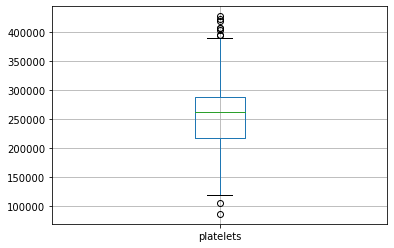

In [618]:
fig = plt.figure()
boxplot = heart.boxplot(column=['platelets'])

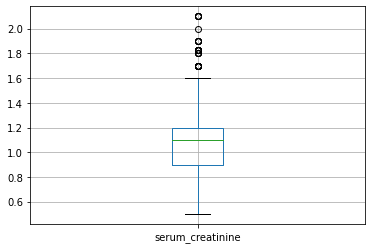

In [619]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_creatinine'])

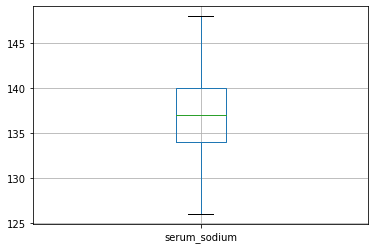

In [620]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_sodium'])

Use barchart to look at the relationships between categorical features and DEATH_EVENT. Categorical features include:
#### anaemia
#### diabetes
#### high_blood_pressure
#### sex
#### smoking

#### Normally, for categorical data, the values should be strings instead of '0' and '1'. If then we would perform add dummy variables so the attributes can be used for model building. But the dataset comes in binary format, so we skip that step.

Raw barcharts vs Normalized barcharts

<AxesSubplot:xlabel='anaemia'>

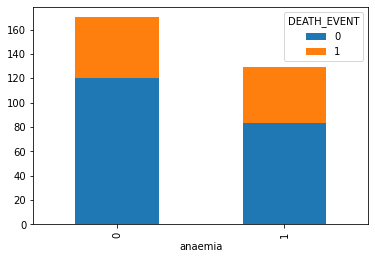

In [621]:
crosstab_anaemia = pd.crosstab(heart['anaemia'], heart['DEATH_EVENT'])
crosstab_anaemia.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='anaemia'>

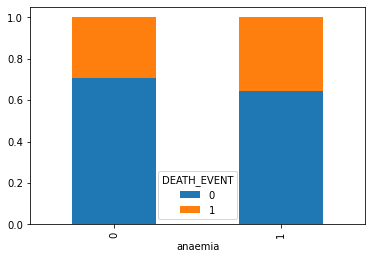

In [622]:
crosstab_norm_anaemia = crosstab_anaemia.div(crosstab_anaemia.sum(axis=1), axis = 0)
crosstab_norm_anaemia.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='diabetes'>

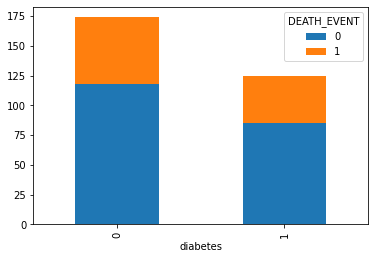

In [623]:
crosstab_diabetes = pd.crosstab(heart['diabetes'], heart['DEATH_EVENT'])
crosstab_diabetes.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='diabetes'>

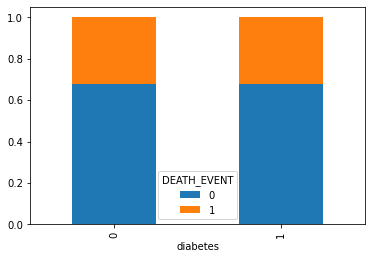

In [624]:
crosstab_norm_diabetes = crosstab_diabetes.div(crosstab_diabetes.sum(axis=1), axis = 0)
crosstab_norm_diabetes.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='high_blood_pressure'>

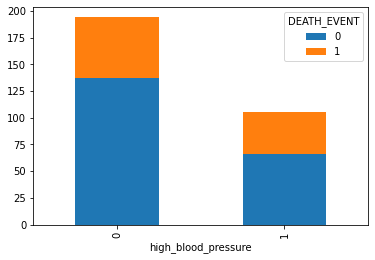

In [625]:
crosstab_high_blood_pressure = pd.crosstab(heart['high_blood_pressure'], heart['DEATH_EVENT'])
crosstab_high_blood_pressure.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='high_blood_pressure'>

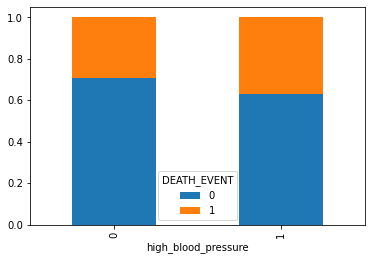

In [626]:
crosstab_norm_high_blood_pressure = crosstab_high_blood_pressure.div(crosstab_high_blood_pressure.sum(axis=1), axis = 0)
crosstab_norm_high_blood_pressure.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='sex'>

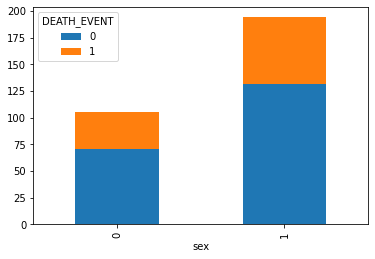

In [627]:
crosstab_sex = pd.crosstab(heart['sex'], heart['DEATH_EVENT'])
crosstab_sex.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='sex'>

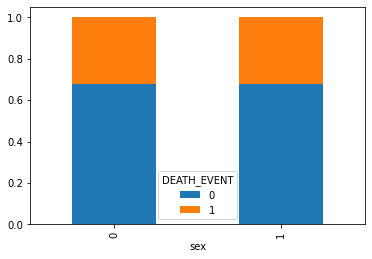

In [628]:
crosstab_norm_sex = crosstab_sex.div(crosstab_sex.sum(axis=1), axis = 0)
crosstab_norm_sex.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='smoking'>

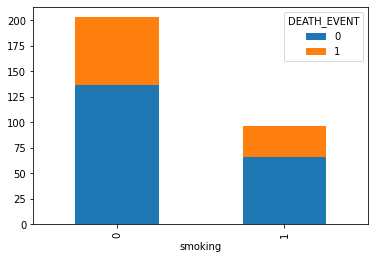

In [629]:
crosstab_smoking = pd.crosstab(heart['smoking'], heart['DEATH_EVENT'])
crosstab_smoking.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='smoking'>

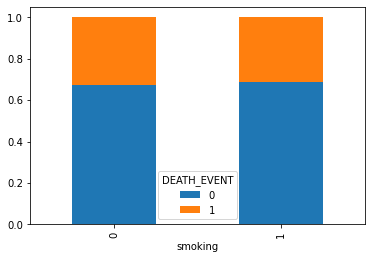

In [630]:
crosstab_norm_smoking = crosstab_smoking.div(crosstab_smoking.sum(axis=1), axis = 0)
crosstab_norm_smoking.plot(kind='bar', stacked = True)

From the above barcharts we can tell that besides having anaemia and high blood pressure is more likely to cause death; the rest of attributes does not necessarily indicate a death event.

#### Check for multicollinearity.

In [631]:
X = pd.DataFrame(heart[['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine',
                       'serum_sodium','age','anaemia','diabetes','high_blood_pressure','sex','smoking','time']])

[Text(0.5, 0, 'creatinine_phosphokinase'),
 Text(1.5, 0, 'ejection_fraction'),
 Text(2.5, 0, 'platelets'),
 Text(3.5, 0, 'serum_creatinine'),
 Text(4.5, 0, 'serum_sodium'),
 Text(5.5, 0, 'age'),
 Text(6.5, 0, 'anaemia'),
 Text(7.5, 0, 'diabetes'),
 Text(8.5, 0, 'high_blood_pressure'),
 Text(9.5, 0, 'sex'),
 Text(10.5, 0, 'smoking'),
 Text(11.5, 0, 'time')]

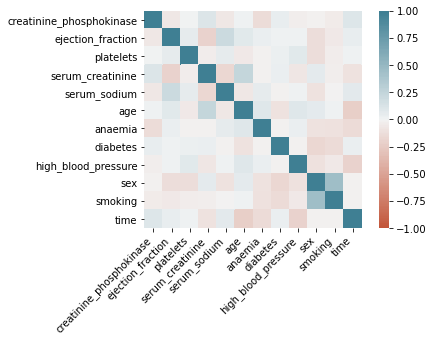

In [632]:
corr = X.corr(method='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [633]:
X.corr()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time
creatinine_phosphokinase,1.000000,-0.067257,0.004120,0.111241,-0.069762,0.009850,-0.140354,0.046520,-0.026001,-0.023429,-0.039783,0.105010
ejection_fraction,-0.067257,1.000000,0.054128,-0.199611,0.197044,0.084025,0.032626,0.013359,0.021615,-0.124140,-0.054775,0.045928
platelets,0.004120,0.054128,1.000000,-0.038749,0.054843,-0.053858,-0.017397,0.030895,0.078735,-0.124587,-0.038568,0.012067
serum_creatinine,0.111241,-0.199611,-0.038749,1.000000,-0.166704,0.249123,-0.011042,0.033689,-0.072018,0.065473,-0.028481,-0.097407
serum_sodium,-0.069762,0.197044,0.054843,-0.166704,1.000000,-0.065669,0.048716,-0.014613,0.011385,-0.091244,-0.001238,0.072922
age,0.009850,0.084025,-0.053858,0.249123,-0.065669,1.000000,0.088006,-0.101012,0.093289,0.065430,0.018668,-0.224068
anaemia,-0.140354,0.032626,-0.017397,-0.011042,0.048716,0.088006,1.000000,-0.012729,0.038182,-0.094769,-0.107290,-0.141414
diabetes,0.046520,0.013359,0.030895,0.033689,-0.014613,-0.101012,-0.012729,1.000000,-0.012732,-0.157730,-0.147173,0.033726
high_blood_pressure,-0.026001,0.021615,0.078735,-0.072018,0.011385,0.093289,0.038182,-0.012732,1.000000,-0.104615,-0.055711,-0.196439
sex,-0.023429,-0.124140,-0.124587,0.065473,-0.091244,0.065430,-0.094769,-0.157730,-0.104615,1.000000,0.445892,-0.015608


In [634]:
X.corr()[abs(X.corr())>=0.5]

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time
creatinine_phosphokinase,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ejection_fraction,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platelets,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serum_creatinine,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serum_sodium,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
anaemia,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
high_blood_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


No Multicollinearity.

### Partition the data and possible resampling.

75% is training set, 25% is test sets

In [635]:
heart_train, heart_test = train_test_split(heart, test_size = 0.25, random_state = 7)

In [636]:
print('Total number of records: ', heart.shape[0])

Total number of records:  299


In [637]:
print("Number of training record is {} and has proportion of {}%".format(heart_train.shape[0], 
                                                                        round(100*heart_train.shape[0]/heart.shape[0],2)))

Number of training record is 224 and has proportion of 74.92%


In [638]:
print("Number of test record is {} and has proportion of {}%".format(heart_test.shape[0], 
                                                                        round(100*heart_test.shape[0]/heart.shape[0],2)))

Number of test record is 75 and has proportion of 25.08%


<BarContainer object of 2 artists>

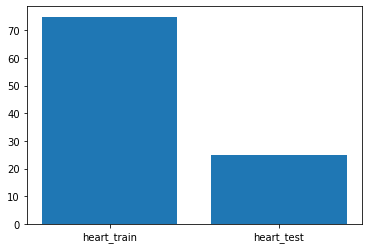

In [639]:
names = ['heart_train', 'heart_test']
percent = [round(100*heart_train.shape[0]/heart.shape[0],2), round(100*heart_test.shape[0]/heart.shape[0],2)]
plt.bar(names, percent)

Check for proportion of death event counts

In [640]:
heart_test['DEATH_EVENT'].value_counts(normalize=True)

0    0.76
1    0.24
Name: DEATH_EVENT, dtype: float64

This shows the proportion of target variable is 24% (death events), no resampling needed.

### Model Building

#### C5.0
#### CART
#### Logistic Regression
#### Random Forest
#### Naive Bayes
#### Neural Network

In [641]:
#heart_train.head()

In [642]:
#heart_test.head()

In [643]:
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#preparing variables of training dataset for building model  

train_y = heart_train[['DEATH_EVENT']]

#all categorical variables from thr dataframe
train_X = heart_train[['ejection_fraction','serum_creatinine','age', 'time']]






In [644]:
#preparing variables of test dataset for building model 

test_y = heart_test[['DEATH_EVENT']]


test_X = heart_test[['ejection_fraction','serum_creatinine','age', 'time']]









#### C5.0





In [645]:
#Building C5.0 algorithm
c50 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes= 5).fit(train_X, train_y)

pred_C50_train =c50.predict(train_X)

#Use c5.0 model to predict on test data
pred_C50_test = c50.predict(test_X)

#Contingency table
contingency_C50 = pd.crosstab(heart_test['DEATH_EVENT'],pred_C50_test)

#Total sum per column: 
contingency_C50.loc['Total',:]= contingency_C50.sum(axis=0)

#Total sum per row: 
contingency_C50.loc[:,'Total'] = contingency_C50.sum(axis=1)
contingency_C50



col_0,0,1,Total
DEATH_EVENT,,,
0,54.0,3.0,57.0
1,5.0,13.0,18.0
Total,59.0,16.0,75.0


In [646]:
#calculating evaluation measures




#### CART





In [647]:
#Building CART Model
cart = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes= 5).fit(train_X, train_y)

pred_cart_train = cart.predict(train_X)



In [648]:
#Use CART model to predict on test data
pred_cart_test = cart.predict(test_X)

#Contingency table 
contingency_cart = pd.crosstab(heart_test['DEATH_EVENT'],pred_cart_test)

#Total sum per column: 
contingency_cart.loc['Total',:]= contingency_cart.sum(axis=0)

#Total sum per row: 
contingency_cart.loc[:,'Total'] = contingency_cart.sum(axis=1)
contingency_cart

col_0,0,1,Total
DEATH_EVENT,,,
0,51.0,6.0,57.0
1,7.0,11.0,18.0
Total,58.0,17.0,75.0





#### Logistic Regression 




In [649]:
#assigning variables to perform logistic regresssion 

X = pd.DataFrame(heart_train[['anaemia', 'high_blood_pressure', 'diabetes','sex', 'smoking','creatinine_phosphokinase','ejection_fraction','platelets', 'serum_creatinine','serum_sodium', 'age', 'time']])
X = sm.add_constant(X)
y = pd.DataFrame(heart_train[['DEATH_EVENT']])

log_reg = sm.Logit(y, X).fit()
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.388932
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.398     
Dependent Variable:    DEATH_EVENT        AIC:                200.2415  
Date:                  2021-08-10 19:46   BIC:                244.5929  
No. Observations:      224                Log-Likelihood:     -87.121   
Df Model:              12                 LL-Null:            -144.78   
Df Residuals:          211                LLR p-value:        5.2864e-19
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                    12.6700   7.7509  1.6347 0.1021 -2.5214 27.8614
anaemia                  -0.2185   0.3961 -0.5516 0.5812 -0.9949  0.5579
high_blood_pressure      -0.3578   0.4139 -0.8645 0.3873 -1.1690  0.4534
diabetes                 -0.1825   0.3978 -0.4589 0.6463 -0.9621  0.5970
sex                      -0.6945   0.4608 -1.5072 0.1318 -1.5976  0.2086
smoking                   0.3254   0.4587  0.7094 0.4781 -0.5736  1.2243
creatinine_phosphokinase  0.0005   0.0007  0.6359 0.5248 -0.0010  0.0019
ejection_fraction        -0.0603   0.0180 -3.3583 0.0008 -0.0955 -0.0251
platelets                -0.0000   0.0000 -1.1719 0.2412 -0.0000  0.0000
serum_creatinine          1.2933   0.6703  1.9294 0.0537 -0.0205  2.6072
serum_sodium             -0.0852   0.0534 -1.5965 0.1104 -0.1899  0.0194
age                       0.0474   0.0180  2.6350 0.0084  0.0121  0.0827
time                     -0.0216   0.0033 -6.5288 0.0000 -0.0281 -0.0151
========================================================================

"""

Here p-value of all the predictors excluding age, time, serum_creatine and  ejection_fraction is more than 0.05.Therefore we will have to remodel the logistic regression and inclue only those variables whose p value is less than 0.05.  

In [650]:
#remodeling logistic regression 

X_remodel = pd.DataFrame(heart_train[['ejection_fraction','serum_creatinine','age', 'time']])
X_remodel = sm.add_constant(X_remodel)
y_remodel = pd.DataFrame(heart_train[['DEATH_EVENT']])

log_reg = sm.Logit(y_remodel, X_remodel).fit()
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.404043
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.375     
Dependent Variable: DEATH_EVENT      AIC:              191.0111  
Date:               2021-08-10 19:46 BIC:              208.0693  
No. Observations:   224              Log-Likelihood:   -90.506   
Df Model:           4                LL-Null:          -144.78   
Df Residuals:       219              LLR p-value:      1.4857e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.7790   1.2512 -0.6227 0.5335 -3.2313  1.6732
ejection_fraction -0.0584   0.0166 -3.5157 0.0004 -0.0910 -0.0259
serum_creatinine   1.4856   0.6319  2.3510 0.0187  0.2471  2.7241
age                0.0468   0.0169  2.7695 0.0056  0.0137  0.0800
time              -0.0202   0.0030 -6.6398 0.0000 -0.0262 -0.0143
=================================================================

"""

In [651]:
X_test = pd.DataFrame(heart_test[['ejection_fraction','serum_creatinine','age', 'time']])
X_test = sm.add_constant(X_test)
y_test = pd.DataFrame(heart_test[['DEATH_EVENT']])
#validating model in test data set 
log_reg_test = sm.Logit(y_test, X_test).fit()
log_reg_test.summary2()

Optimization terminated successfully.
         Current function value: 0.193031
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.650     
Dependent Variable: DEATH_EVENT      AIC:              38.9547   
Date:               2021-08-10 19:46 BIC:              50.5421   
No. Observations:   75               Log-Likelihood:   -14.477   
Df Model:           4                LL-Null:          -41.331   
Df Residuals:       70               LLR p-value:      6.0602e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const              2.4100   4.9896  0.4830 0.6291 -7.3694 12.1895
ejection_fraction -0.1813   0.0677 -2.6781 0.0074 -0.3141 -0.0486
serum_creatinine   5.4197   2.7792  1.9501 0.0512 -0.0275 10.8669
age               -0.0018   0.0523 -0.0353 0.9718 -0.1044  0.1007
time              -0.0328   0.0124 -2.6405 0.0083 -0.0571 -0.0085
=================================================================

"""

We can look at the performance metrics using confusion_matrix. But first, we need to make predictions using the model: the outputs given back by the model are probabilities of the instance being the positive class. If probability > 0.5, the instance is considered the positive class.

In [652]:
#obtaining prediction using logistic regression model
predictions_prob = log_reg.predict(X_test)
predictions_prob.head()

268    0.011058
240    0.129470
278    0.015835
176    0.201871
202    0.031245
dtype: float64





#### Random Forest





In [653]:
from sklearn.ensemble import RandomForestClassifier
rfy = np.ravel(Y)

rand_forest = RandomForestClassifier(n_estimators = 100,criterion="gini").fit(train_X,rfy)
pred_rf_train= rand_forest.predict(train_X)

NameError: name 'Y' is not defined

In [ ]:
#Use random forest model to predict on test data
pred_rf_test = rand_forest.predict(test_X)

#Contingency table 
contingency_rf = pd.crosstab(heart_test['DEATH_EVENT'],pred_rf_test)

#Total sum per column: 
contingency_rf.loc['Total',:]= contingency_rf.sum(axis=0)

#Total sum per row: 
contingency_rf.loc[:,'Total'] = contingency_rf.sum(axis=1)
contingency_rf




#### Naive Bayes




In [ ]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB().fit(train_X, train_y)

In [ ]:
pred_naiv = naive_bayes.predict(test_X)

#Contingency table 
contingency_nb = pd.crosstab(heart_test['DEATH_EVENT'],pred_naiv)

#Total sum per column: 
contingency_nb.loc['Total',:]= contingency_nb.sum(axis=0)

#Total sum per row: 
contingency_nb.loc[:,'Total'] = contingency_nb.sum(axis=1)
contingency_nb




#### Neural Network



In [654]:
#train_y = heart_train[['DEATH_EVENT']]
#all categorical variables from thr dataframe
#train_X = heart_train[['ejection_fraction','serum_creatinine','age', 'time']]

import pandas as pd 
import numpy as np 
import warnings 

from keras.models import Sequential 
from keras.layers import Dense

#normilzation

age_norm = (heart_train['age']-heart_train['age'].min())/(heart_train['age'].max()-heart_train['age'].min())
time_norm= (heart_train['time']-heart_train['time'].min())/(heart_train['time'].max()-heart_train['time'].min())
ejection_fraction_norm= (heart_train['ejection_fraction']-heart_train['ejection_fraction'].min())/(heart_train['ejection_fraction'].max()-heart_train['ejection_fraction'].min())
serum_creatinine_norm= (heart_train['serum_creatinine']-heart_train['serum_creatinine'].min())/(heart_train['serum_creatinine'].max()-heart_train['serum_creatinine'].min())

age_norm_1d = np.array(age_norm).reshape(-1,1)
time_norm_1d = np.array(time_norm).reshape(-1,1)
ejection_fraction_norm_1d = np.array(ejection_fraction_norm).reshape(-1,1)
serum_creatinine_norm_1d = np.array(serum_creatinine_norm).reshape(-1,1)



nn_X = np.concatenate ((age_norm_1d ,time_norm_1d,ejection_fraction_norm_1d,serum_creatinine_norm_1d),axis=1)
nn_y= train_y 


# define the keras model
model = Sequential()
model.add(Dense(1, input_dim=nn_X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# fit the keras model on the dataset
model.fit(nn_X, nn_y, epochs=10, batch_size=32)


# evaluate the keras model
_, accuracy = model.evaluate(nn_X, nn_y)
print('Accuracy: %.2f' % (accuracy*100))



Epoch 1/10
7/7 [==============================] - 2s 13ms/step - loss: 0.6597 - accuracy: 0.6595
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6628 - accuracy: 0.6351
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6564
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.6553
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6721
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6469 - accuracy: 0.6556
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.6514
Epoch 8/10
7/7 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6375
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.6714
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 0.6439 - accuracy: 0.6518
Accuracy: 65.18


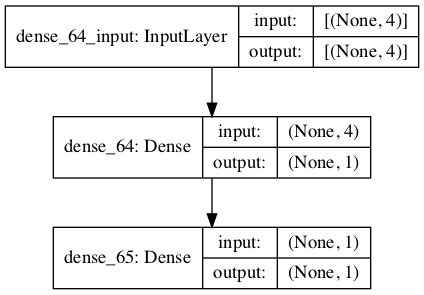

In [655]:
import os 
os.environ["PATH"] += os.pathsep + '/Users/Blaven/miniconda3/envs/ADS500B/lib/python3.9/site-packages'
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes = True , show_layer_names = True)


In [658]:
test_age_norm = (heart_test['age']-heart_test['age'].min())/(heart_test['age'].max()-heart_test['age'].min())
test_time_norm= (heart_test['time']-heart_test['time'].min())/(heart_test['time'].max()-heart_test['time'].min())
test_ejection_fraction_norm= (heart_test['ejection_fraction']-heart_test['ejection_fraction'].min())/(heart_test['ejection_fraction'].max()-heart_test['ejection_fraction'].min())
test_serum_creatinine_norm= (heart_test['serum_creatinine']-heart_test['serum_creatinine'].min())/(heart_test['serum_creatinine'].max()-heart_test['serum_creatinine'].min())

test_age_norm_1d = np.array(test_age_norm).reshape(-1,1)
test_time_norm_1d = np.array(test_time_norm).reshape(-1,1)
test_ejection_fraction_norm_1d = np.array(test_ejection_fraction_norm).reshape(-1,1)
test_serum_creatinine_norm_1d = np.array(test_serum_creatinine_norm).reshape(-1,1)



test2_X =np.concatenate((test_age_norm_1d ,test_time_norm_1d,test_ejection_fraction_norm_1d,test_serum_creatinine_norm_1d),axis=1)
test2_y= test_y 


# define the keras model
model_2 = Sequential()
model_2.add(Dense(1, input_dim=test2_X.shape[1], activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

# compile the keras model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# fit the keras model on the dataset
model_2.fit(test2_X, test2_y, epochs=10, batch_size=32)


# evaluate the keras model
_,accuracy_2 = model_2.evaluate(test2_X,test2_y)
print('Accuracy: %.2f' % (accuracy_2*100))

Epoch 1/10
3/3 [==============================] - 1s 2ms/step - loss: 0.6857 - accuracy: 0.7550
Epoch 2/10
3/3 [==============================] - 0s 7ms/step - loss: 0.6829 - accuracy: 0.7277
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6822 - accuracy: 0.7745
Epoch 4/10
3/3 [==============================] - 0s 12ms/step - loss: 0.6788 - accuracy: 0.7667
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.7706
Epoch 6/10
3/3 [==============================] - 0s 7ms/step - loss: 0.6786 - accuracy: 0.7706
Epoch 7/10
3/3 [==============================] - 0s 7ms/step - loss: 0.6775 - accuracy: 0.7355
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.7628
Epoch 9/10
3/3 [==============================] - 0s 7ms/step - loss: 0.6735 - accuracy: 0.7550
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.7600
Accuracy: 76.00


In [659]:
#
hi = model_2.predict(test2_X)
hi

array([[0.4420011 ],
       [0.49187988],
       [0.4027072 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4243324 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.48086902],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.49219537],
       [0.4657454 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.48004594],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.45699474],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.47287992],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.46499512],
       [0.4850839 ],
       [0.4929333 ],
       [0.4929333 ],
       [0.484

In [ ]:
library(nnet)
library(NeuralNetTools)

url = 'https://raw.githubusercontent.com/dingyiduan7/ADS-502/main/ADS%20502%20Final_Project/heart_failure_clinical_records_dataset.csv'


heart <- read.csv(file=url)


#heart_train, heart_test = train_test_split(heart, test_size = 0.25, random_state = 7)
set.seed(7)
n<- dim (heart)[1]
train_ind <-  runif(n) <0.75
heart_train <- heart[train_ind,]
heart_test <- heart[!train_ind,]




#normalize age and time 
heart_train$age.mm <- ((heart_train$age - min(heart_train$age))/(max(heart_train$age) -min(heart_train$age)))
heart_train$time.mm <- ((heart_train$time - min(heart_train$time))/(max(heart_train$time) -min(heart_train$time)))
heart_train$ejection_fraction.mm <- ((heart_train$ejection_fraction - min(heart_train$ejection_fraction))/(max(heart_train$ejection_fraction) -min(heart_train$ejection_fraction)))
heart_train$serum_creatinine.mm <- ((heart_train$serum_creatinine - min(heart_train$serum_creatinine))/(max(heart_train$serum_creatinine) -min(heart_train$serum_creatinine)))


nnet02 <- nnet (DEATH_EVENT ~ ejection_fraction+serum_creatinine+ time+ age , heart_train, size =2)
X_train <-subset(x=heart_train,select = c("age","time","ejection_fraction","serum_creatinine"))
heart_train$pred_nnet02 <- predict(object = nnet02, newdata=X_train)
heart_train$pred_nnet02 <- (heart_train$pred_nnet02 > 0.5)*1

plotnet(nnet02)






In [ ]:
library(caret)

heart_test$ejection_fraction<- as.factor(heart_test$ejection_fraction)
heart_test$serum_creatinine<- as.factor(heart_test$serum_creatinine)


    
X_test <- subset(x= heart_test, select = c("ejection_fraction","serum_creatinine"))
table_nnet <- table(heart_train$DEATH_EVENT,heart_train$pred_nnet02)
table_nnet <- addmargins (A = table_nnet,FUN = list(Total=sum),quiet = TRUE);

table_nnet

In [ ]:
heart_train[c('DEATH_EVENT','pred_nnet02')] <-lapply(
heart_train  [c('DEATH_EVENT','pred_nnet02')], as.factor)
confusionMatrix(heart_train$pred_nnet02,heart_train$DEATH_EVENT,positive = "1")